In [19]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from scipy.stats import chi2_contingency

pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings('ignore')

In [20]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv.zip")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# **UNDERSTANDING OF DATA**

In [22]:
print("Basic Information about data\n")
print(df.info())

print(f"Total rows: {df.shape[0]} | Total Columns: {df.shape[1]}\n")

print("Total columns in dataset\n")
for cols in df.columns:
  print(cols)

# Unique values in each column
print("\nDistinct values in each column\n")
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column}: {unique_values} distinct values")

df.describe().style.format("{:.2f}")


Basic Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
Total rows: 100000 | Total Columns: 9

Total columns in dataset

gender
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level
diabetes

Distinct values in each column

gender: 3 distinct values
age: 102 d

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [23]:
# Showing Duplicate Data

print(f"Total Duplicate Data: {df.duplicated().sum()}")

# Handle Duplicates
df = df.drop_duplicates()

Total Duplicate Data: 3854


In [24]:
print(df.isnull().sum())
df.dropna(inplace=True)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [25]:
male, female, other = df['gender'].value_counts()
other_percentage = other*100/(male+female+other)
print(other_percentage)

# Constitutes 0.0188% of data
df = df[df['gender'] != 'Other']

0.018721527676658415


# **DATA VISUALIZATION**

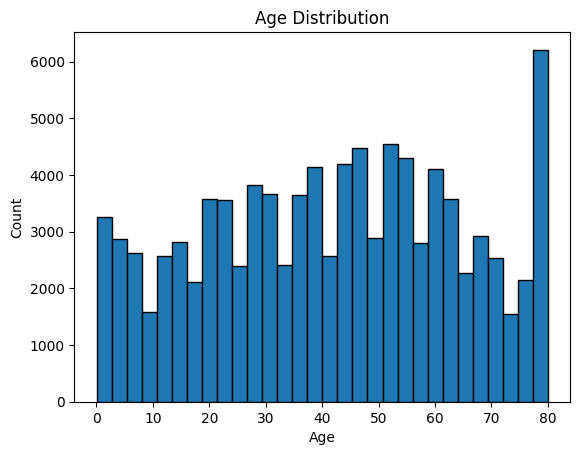

In [26]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


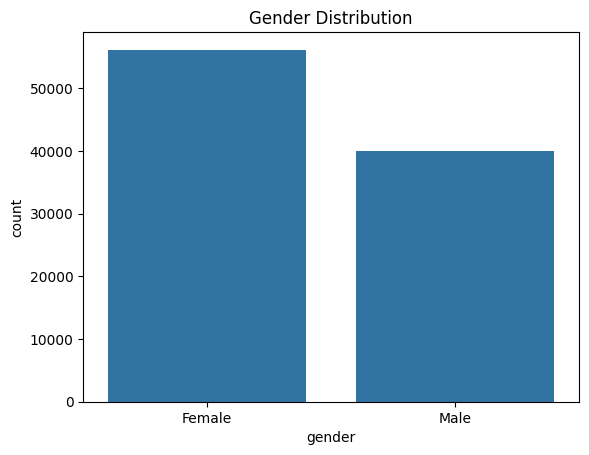

In [27]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

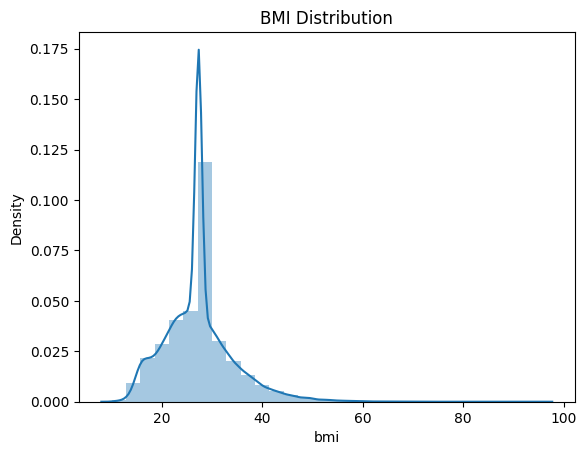

In [28]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

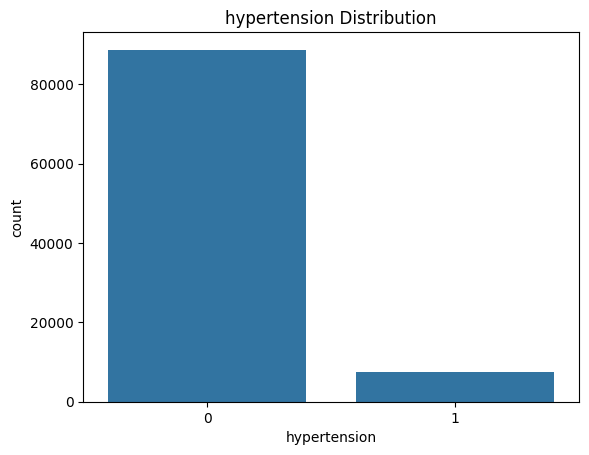

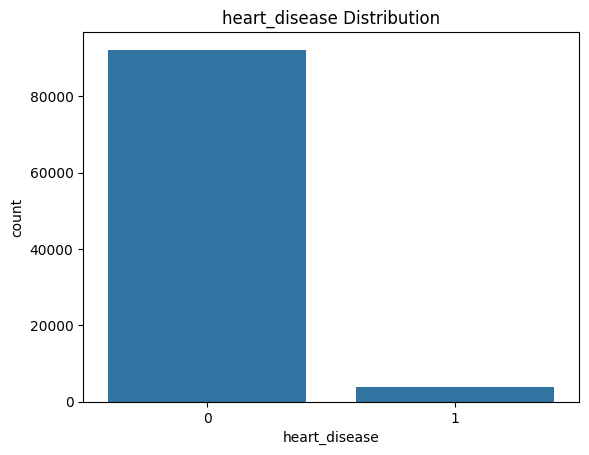

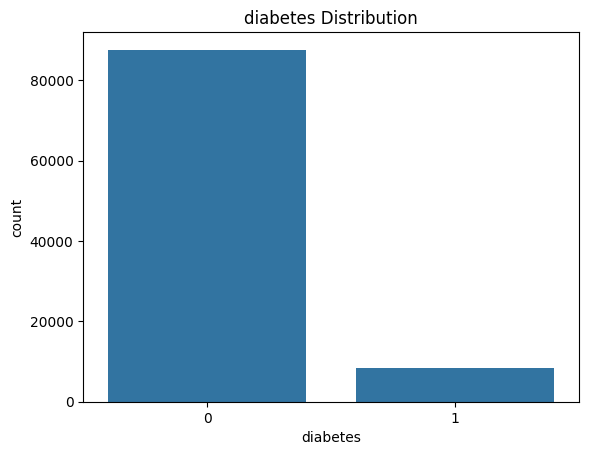

In [29]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

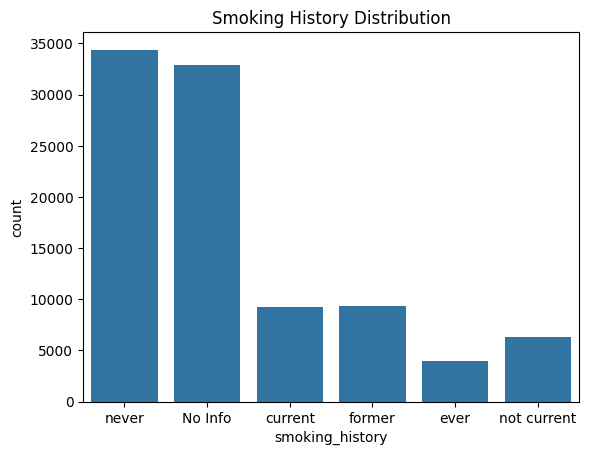

In [30]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

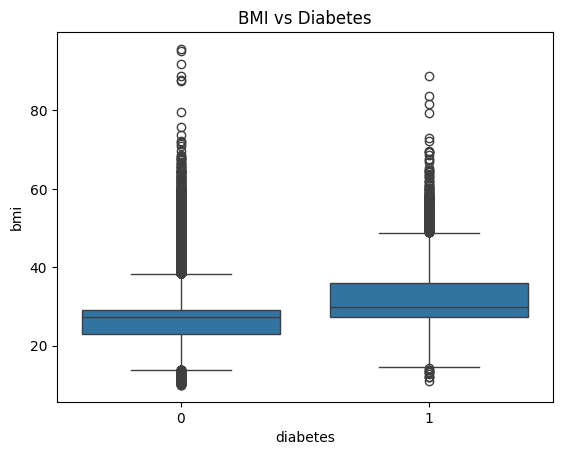

In [31]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

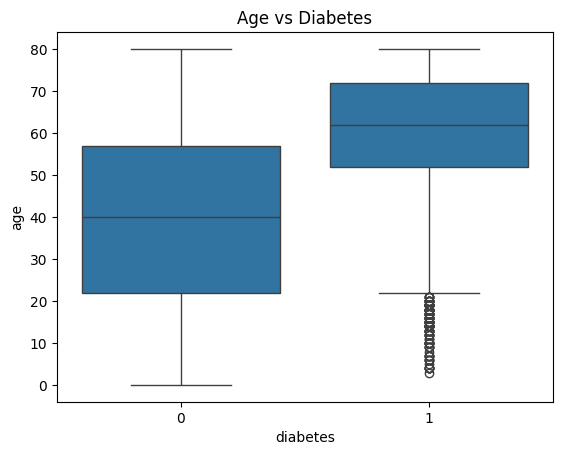

In [32]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()


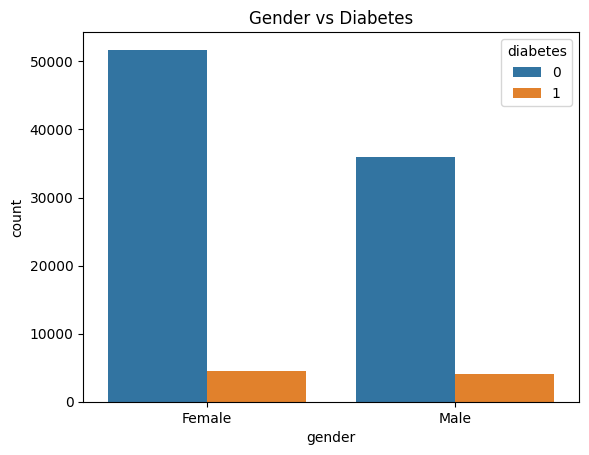

In [33]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

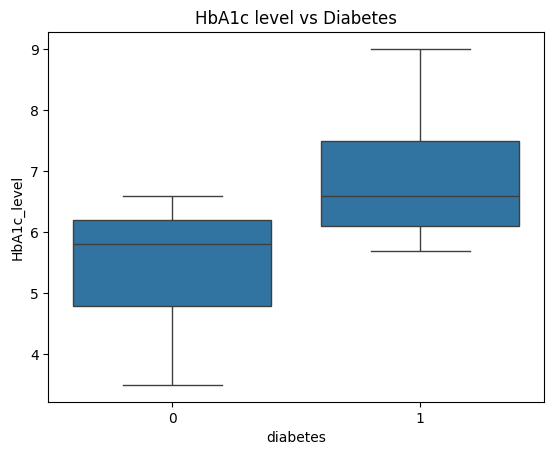

In [34]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

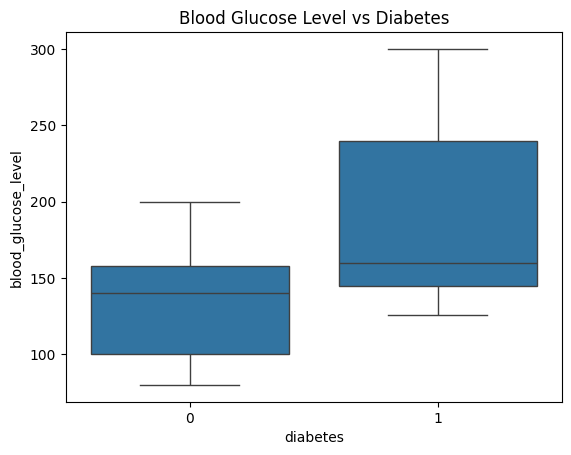

In [35]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

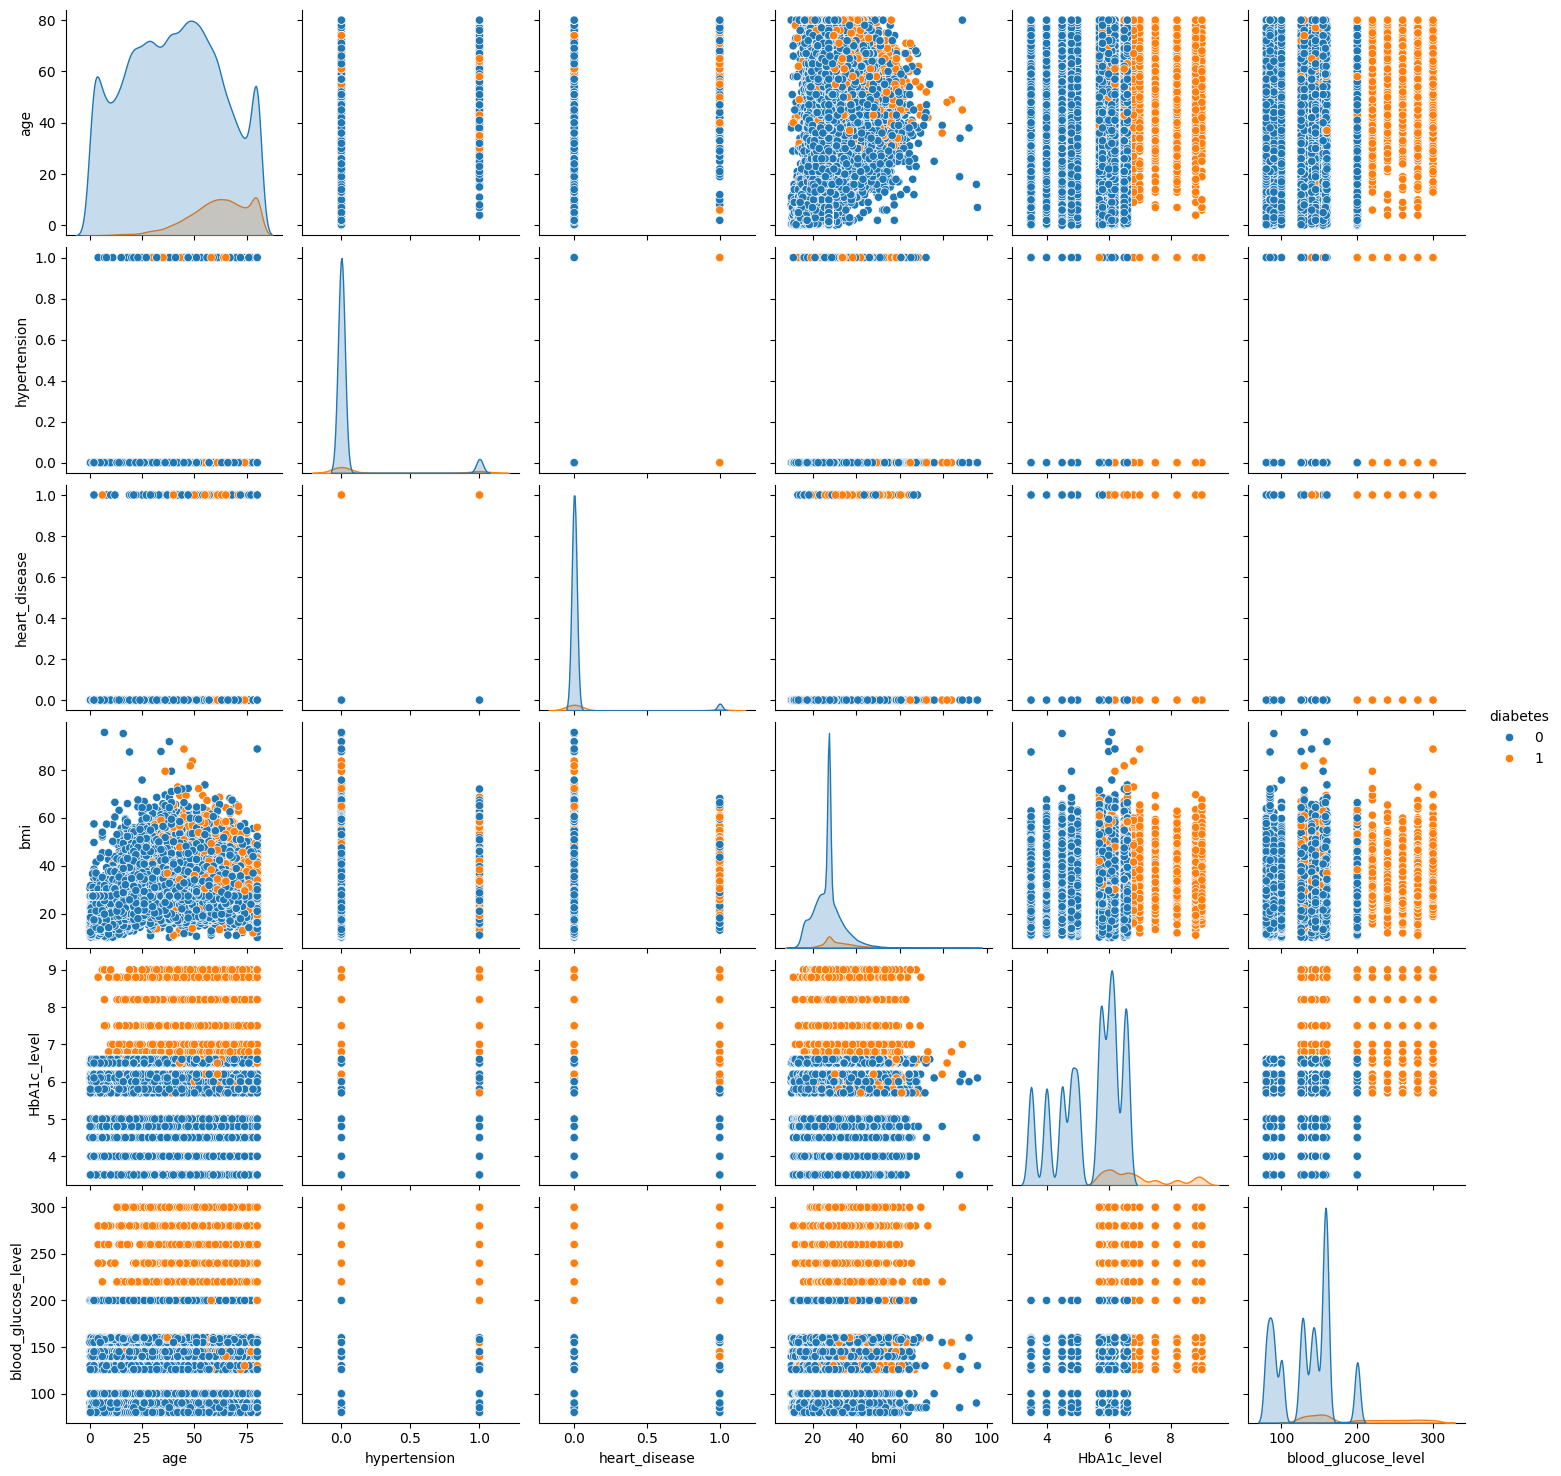

In [36]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

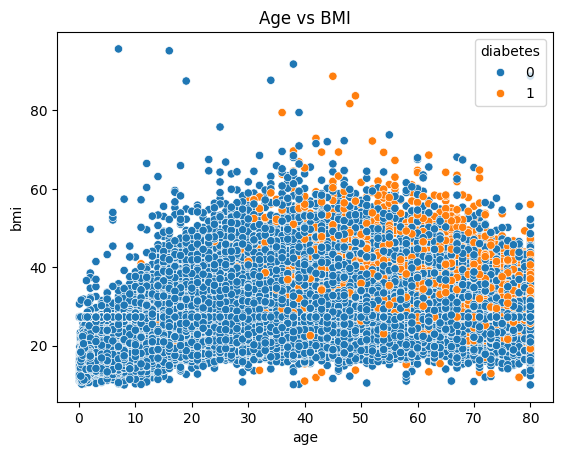

In [37]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

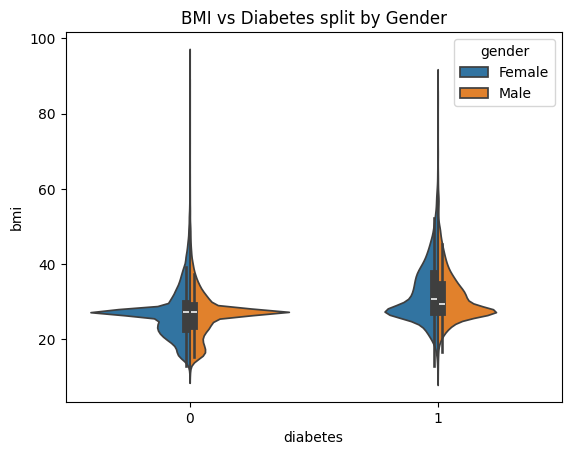

In [38]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

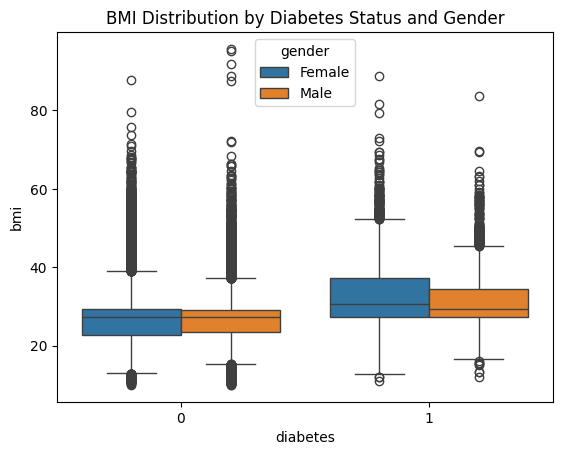

In [39]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

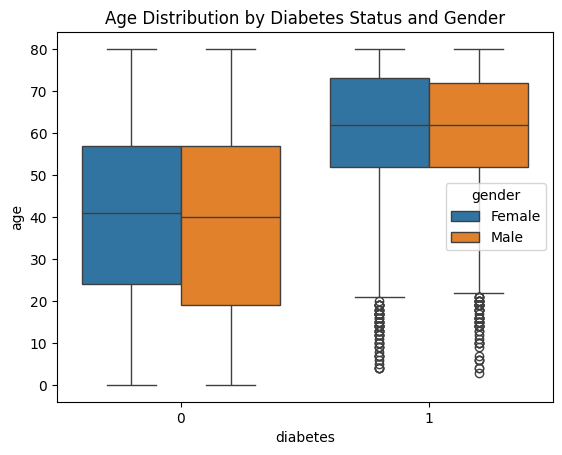

In [40]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

In [41]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [42]:
data = df.copy()

In [43]:
# Perform One Hot Encoding

def perform_one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')


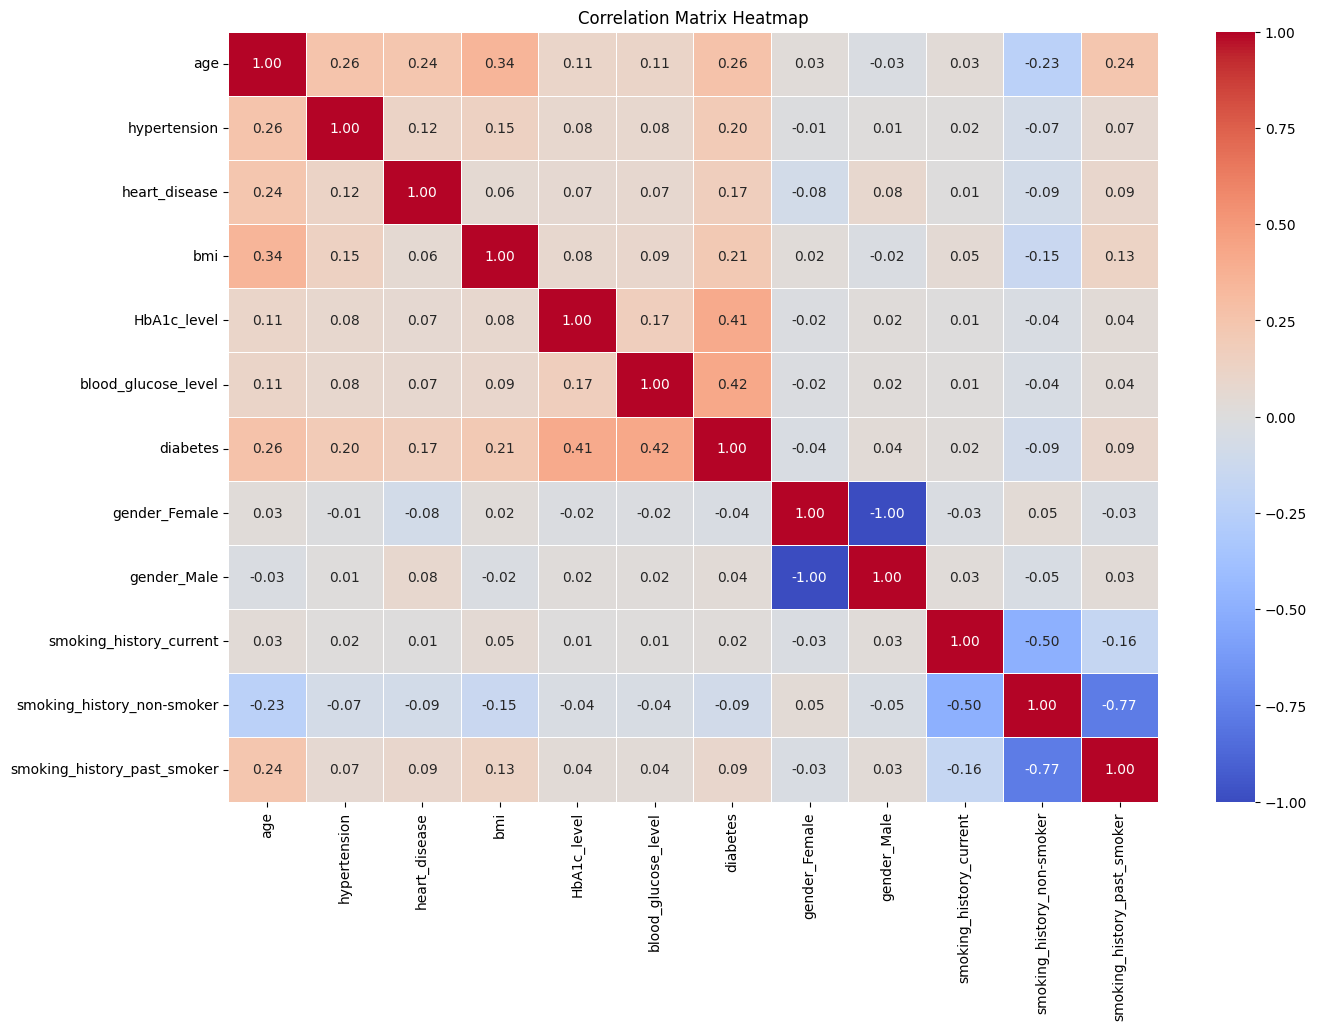

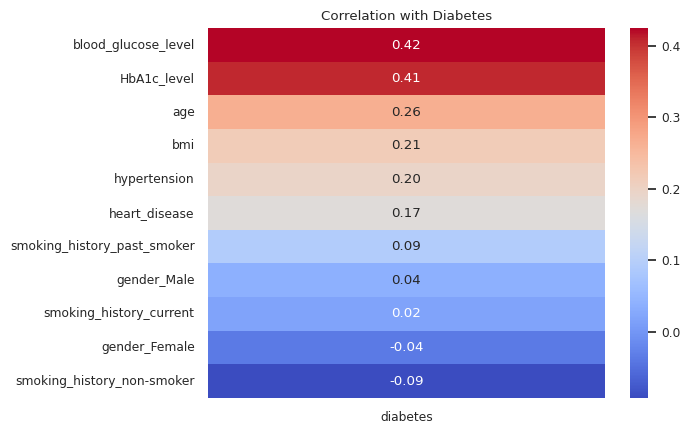

In [44]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

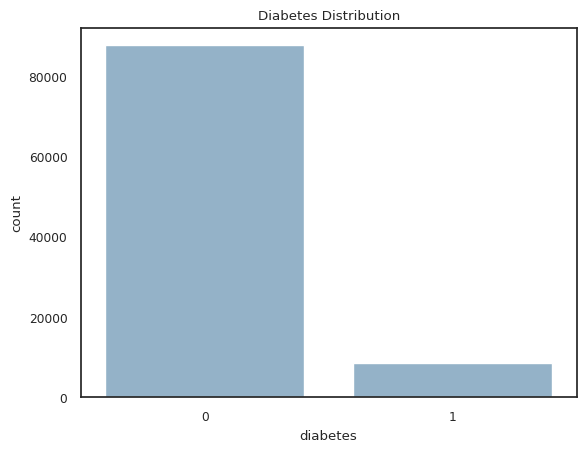

In [45]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()


In [46]:
# Chi-square test

#Function for Chi-square test
def chi_square_test(df, col, target='diabetes'):
    contingency = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"\n=== Chi-Square Test: {col} vs {target} ===")
    print("Chi2 Value:", chi2)
    print("p-value:", p)

    if p < 0.05:
        print("Significant relationship")
    else:
        print("Not significant relationship")

#Performing Chi-square test on categorical columns
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    chi_square_test(df, col, 'diabetes')

# Converting Numerical values to Categorical through binning for Chi-square test

df['age_bin'] = pd.cut(df['age'],
                       bins=[0, 30, 45, 60, 120],
                       labels=['young', 'middle', 'senior', 'old'])
df['bmi_bin'] = pd.cut(df['bmi'],
                       bins=[0, 18.5, 25, 30, 60],
                       labels=['underweight', 'normal', 'overweight', 'obese'])
df['hba1c_bin'] = pd.cut(df['HbA1c_level'],
                         bins=[0, 5.7, 6.4, 14],
                         labels=['normal', 'prediabetes', 'diabetes_range'])
df['glucose_bin'] = pd.cut(df['blood_glucose_level'],
                           bins=[0, 100, 125, 200, 400],
                           labels=['normal', 'prediabetic', 'diabetic', 'severe'])

numeric_bins = ['age_bin', 'bmi_bin', 'hba1c_bin', 'glucose_bin']

for col in numeric_bins:
    chi_square_test(df, col, 'diabetes')


# All features showed a highly significant association with diabetes, indicating strong predictive value
df.drop(['age_bin', 'bmi_bin', 'hba1c_bin', 'glucose_bin'], axis=1, inplace=True)


=== Chi-Square Test: gender vs diabetes ===
Chi2 Value: 137.34939636195776
p-value: 1.0112949442961092e-31
Significant relationship

=== Chi-Square Test: smoking_history vs diabetes ===
Chi2 Value: 926.3180296776645
p-value: 7.121895742583954e-202
Significant relationship

=== Chi-Square Test: age_bin vs diabetes ===
Chi2 Value: 7200.565760997803
p-value: 0.0
Significant relationship

=== Chi-Square Test: bmi_bin vs diabetes ===
Chi2 Value: 3837.2879695622323
p-value: 0.0
Significant relationship

=== Chi-Square Test: hba1c_bin vs diabetes ===
Chi2 Value: 10079.228964627484
p-value: 0.0
Significant relationship

=== Chi-Square Test: glucose_bin vs diabetes ===
Chi2 Value: 36407.710491137404
p-value: 0.0
Significant relationship


In [47]:
print(df["diabetes"].value_counts())

diabetes
0    87646
1     8482
Name: count, dtype: int64


In [50]:
# TESTING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True)
}

resampling_methods = {
    "SMOTE (1.0)": SMOTE(sampling_strategy=1),
    "SMOTE-ENN": SMOTEENN(),
    "SMOTE(0.1)+Under(0.5)": "combined"
}

results = []

for method_name, sampler in resampling_methods.items():
    for model_name, model in models.items():

        if method_name == "SMOTE(0.1)+Under(0.5)":
            pipeline = imbPipeline(steps=[
                ('preprocessor', preprocessor),
                ('smote', SMOTE(sampling_strategy=0.1)),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('classifier', model)
            ])
        else:
            pipeline = imbPipeline(steps=[
                ('preprocessor', preprocessor),
                ('sampler', sampler),
                ('classifier', model)
            ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append([method_name, model_name, acc])

results_df = pd.DataFrame(results, columns=["Resampling Method", "Model", "Accuracy"])
print(results_df)

comparison_table = results_df.pivot(index="Model", columns="Resampling Method", values="Accuracy")
print("\n Final Accuracy Comparison Table:")
print(comparison_table)

        Resampling Method                Model  Accuracy
0             SMOTE (1.0)  Logistic Regression      0.88
1             SMOTE (1.0)                  KNN      0.91
2             SMOTE (1.0)        Random Forest      0.96
3             SMOTE (1.0)             AdaBoost      0.90
4             SMOTE (1.0)              XGBoost      0.97
5             SMOTE (1.0)                  SVM      0.89
6               SMOTE-ENN  Logistic Regression      0.87
7               SMOTE-ENN                  KNN      0.89
8               SMOTE-ENN        Random Forest      0.93
9               SMOTE-ENN             AdaBoost      0.89
10              SMOTE-ENN              XGBoost      0.95
11              SMOTE-ENN                  SVM      0.87
12  SMOTE(0.1)+Under(0.5)  Logistic Regression      0.92
13  SMOTE(0.1)+Under(0.5)                  KNN      0.92
14  SMOTE(0.1)+Under(0.5)        Random Forest      0.93
15  SMOTE(0.1)+Under(0.5)             AdaBoost      0.93
16  SMOTE(0.1)+Under(0.5)      

In [51]:
!git clone https://github.com/satyamanand135-maker/diabetes-prediction.git

Cloning into 'diabetes-prediction'...


In [52]:
%cd diabetes-prediction


/content/diabetes-prediction


In [57]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
!ls /content/drive/MyDrive


 AAPL_historical_data.csv	       stage_4_earthquake_dataset.csv
 alzheimer.csv			       StockMarketDataset.csv
 amazon.csv.zip			       StudentsPerformance.csv
'Colab Notebooks'		       uncleaned_dataset.csv
 diabetes_prediction_dataset.csv.zip  'Untitled spreadsheet.gsheet'
 EarthquakeIDA.csv


In [59]:
!ls "/content/drive/MyDrive/Colab Notebooks"


'DiabetesDataPrediction (3).ipynb'   Untitled13.ipynb
 DiabetesDataPrediction.ipynb	     Untitled14.ipynb
 EarthquakePrediction.ipynb	     Untitled1.ipynb
'Final_IIITN (1).ipynb'		     Untitled2.ipynb
 Final_IIITN.ipynb		     Untitled3.ipynb
 IDA_Project.ipynb		     Untitled4.ipynb
 IDA_PROJECT.ipynb		     Untitled5.ipynb
 oooo.ipynb			     Untitled6.ipynb
 StockMarketAnalysis.ipynb	     Untitled7.ipynb
 Untitled0.ipynb		     Untitled8.ipynb
 Untitled10.ipynb		     Untitled9.ipynb
 Untitled11.ipynb


In [60]:
%cd /content/diabetes-prediction


/content/diabetes-prediction
